In [2]:
import yfinance as yf
import seaborn as sn
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

## Getting Data

In [5]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'GOOGL', 'GOOG', 'META', 'NVDA', 'CSCO', 'ADBE', 'QCOM', 'ORCL', 'IBM', 'INTC', 'NFLX', 'PYPL', 'SONY', 'SQ']

def get_price_history(ticker, save=True, START_DATE = '2022-9-12', END_DATE = '2022-11-10', RAW_INTERVAL = "5m"):

    tickerData = yf.Ticker(ticker)
    df = tickerData.history(interval=RAW_INTERVAL,  start=START_DATE, end=END_DATE)
    
    if save:
        df.to_csv("data/yahoo/{}_5m.csv".format(ticker), index=False)

# for ticker in tickers:
#     get_price_history(ticker)

In [6]:
data = []

for csv_file in glob.glob("data/yahoo/*_5m.csv"):
    df = pd.read_csv(csv_file)
    data.append(df)
    print(csv_file, df.shape[0])

data/yahoo\AAPL_5m.csv 3355
data/yahoo\ADBE_5m.csv 3355
data/yahoo\AMZN_5m.csv 3355
data/yahoo\CSCO_5m.csv 3355
data/yahoo\GOOGL_5m.csv 3355
data/yahoo\GOOG_5m.csv 3355
data/yahoo\IBM_5m.csv 3355
data/yahoo\INTC_5m.csv 3355
data/yahoo\META_5m.csv 3355
data/yahoo\MSFT_5m.csv 3355
data/yahoo\NFLX_5m.csv 3251
data/yahoo\NVDA_5m.csv 3355
data/yahoo\ORCL_5m.csv 3355
data/yahoo\PYPL_5m.csv 3355
data/yahoo\QCOM_5m.csv 3355
data/yahoo\SONY_5m.csv 3355
data/yahoo\SQ_5m.csv 3355
data/yahoo\TSLA_5m.csv 3355


## Correlation Matrix

In [7]:
close_prices = pd.DataFrame(columns=tickers)
for i in range(len(tickers)):
    close_prices[tickers[i]] = data[i]['Close']
    
corrMatrix = close_prices.corr()
corrMatrix

,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,CSCO,ADBE,QCOM,ORCL,IBM,INTC,NFLX,PYPL,SONY,SQ
AAPL,1.000000,0.588327,0.581033,0.414879,0.593612,0.577808,0.159207,0.713973,0.452978,0.696219,0.083824,0.331886,0.278120,0.678772,0.820216,0.229948,0.572705,0.715135
MSFT,0.588327,1.000000,0.320385,0.688099,0.383236,0.371794,0.408532,0.649326,0.183072,0.543968,0.195716,0.460162,0.648546,0.442666,0.474260,0.401016,0.719903,0.190622
AMZN,0.581033,0.320385,1.000000,-0.237974,0.959182,0.959998,-0.549181,0.171611,0.932534,0.851959,-0.348774,-0.296870,-0.364919,0.856208,0.732534,-0.278727,0.377237,0.678750
TSLA,0.414879,0.688099,-0.237974,1.000000,-0.193517,-0.212613,0.905963,0.735371,-0.387009,0.101327,0.603359,0.858491,0.955935,0.029748,0.192636,0.702476,0.614449,-0.049105
GOOGL,0.593612,0.383236,0.959182,-0.193517,1.000000,0.999346,-0.507738,0.205221,0.916790,0.899781,-0.315315,-0.275605,-0.307247,0.812155,0.717830,-0.248832,0.386915,0.593942
GOOG,0.577808,0.371794,0.959998,-0.212613,0.999346,1.000000,-0.528759,0.193449,0.922198,0.893105,-0.342014,-0.289663,-0.325609,0.813808,0.713042,-0.253442,0.384565,0.595421
META,0.159207,0.408532,-0.549181,0.905963,-0.507738,-0.528759,1.000000,0.529098,-0.664508,-0.210905,0.731213,0.824323,0.928150,-0.293880,-0.096050,0.637520,0.312840,-0.305204
NVDA,0.713973,0.649326,0.171611,0.735371,0.205221,0.193449,0.529098,1.000000,0.133928,0.496005,0.056633,0.789129,0.620279,0.445197,0.641926,0.787191,0.820280,0.534767
CSCO,0.452978,0.183072,0.932534,-0.387009,0.916790,0.922198,-0.664508,0.133928,1.000000,0.812603,-0.542155,-0.348428,-0.507328,0.782580,0.672203,-0.215961,0.301032,0.697467
ADBE,0.696219,0.543968,0.851959,0.101327,0.899781,0.893105,-0.210905,0.496005,0.812603,1.000000,-0.202931,0.096832,-0.051310,0.843261,0.832849,0.057417,0.601015,0.624298


## Heat Map

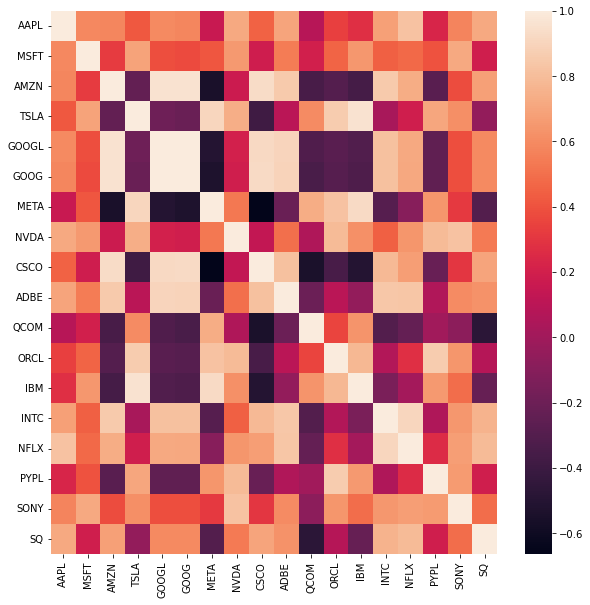

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(corrMatrix, ax=ax)
plt.show()

## Correlation by pairs

In [9]:
correlation_by_pairs = []
for i in range(len(tickers)):
    for j in range(i+1,len(tickers)):
        ticker1, ticker2 = tickers[i], tickers[j]
        corr_coef = close_prices[ticker1].corr(close_prices[ticker2])
        correlation_by_pairs.append([ticker1, ticker2, corr_coef])

# sort pairs of stocks based on their correlation coefficient
correlation_by_pairs.sort(key=lambda x: x[2], reverse=True)
correlation_by_pairs

[['GOOGL', 'GOOG', 0.9993463572789872],
 ['AMZN', 'GOOG', 0.9599984307488288],
 ['AMZN', 'GOOGL', 0.9591821336136707],
 ['TSLA', 'IBM', 0.9559352996351177],
 ['AMZN', 'CSCO', 0.9325342409105419],
 ['META', 'IBM', 0.9281502689878698],
 ['GOOG', 'CSCO', 0.922197809196133],
 ['GOOGL', 'CSCO', 0.9167897219558225],
 ['TSLA', 'META', 0.905963080774737],
 ['INTC', 'NFLX', 0.9024772810467747],
 ['GOOGL', 'ADBE', 0.8997813422292023],
 ['GOOG', 'ADBE', 0.8931051010925436],
 ['TSLA', 'ORCL', 0.8584914595437525],
 ['ORCL', 'PYPL', 0.8583066619462775],
 ['AMZN', 'INTC', 0.8562083326025829],
 ['AMZN', 'ADBE', 0.8519594594470719],
 ['ADBE', 'INTC', 0.8432610098705754],
 ['ADBE', 'NFLX', 0.8328490167426691],
 ['META', 'ORCL', 0.8243234950565079],
 ['NVDA', 'SONY', 0.8202804446563291],
 ['AAPL', 'NFLX', 0.8202161826706308],
 ['GOOG', 'INTC', 0.8138076290929165],
 ['CSCO', 'ADBE', 0.8126032567927776],
 ['GOOGL', 'INTC', 0.812155470470871],
 ['NVDA', 'ORCL', 0.7891288619767581],
 ['NVDA', 'PYPL', 0.78719

In [11]:
best_group = ['GOOG', 'AAPL', 'TSLA', 'QCOM']
best_group_corr_coefs = []
for i in range(len(best_group)):
    for j in range(i+1, len(best_group)):
        corr_coef = close_prices[best_group[i]].corr(close_prices[best_group[j]])
        best_group_corr_coefs.append(corr_coef)
np.mean(best_group_corr_coefs)

0.18754034103109554